# Homework 3
## Applied Machine Learning - CS 5785
## Due: October 25, 2022
## Submitted: October 27, 2022 (+2 late days)
### Amir ElTabakh - ae362@cornell.edu
### Josh Misir - jm2448@cornell.edu

![](cornell_tech3.png)


## Part 1. Eigenface for face recognition. (40 pts)

In this assignment you will implement the Eigenface method for recognizing human faces. You
will use face images from The Yale Face Database B, where there are 64 images under different
lighting conditions per each of 10 distinct subjects, 640 face images in total.


Read more (optional):
- Eigenface onWikipedia: https://en.wikipedia.org/wiki/Eigenface
- Eigenface on Scholarpedia: http://www.scholarpedia.org/article/Eigenfaces

**(a)** (2 pts) Download The Face Dataset and unzip faces.zip, You will find a folder called images
which contains all the training and test images; train.txt and test.txt specifies the training set and test (validation) set split respectively, each line gives an image path and the corresponding label.

**COMPLETE**


**(b)** 
(2 pts) Load the training set into a matrix $X$: there are 540 training images in total, each has 50 $\times$ 50 pixels that need to be concatenated into a 2500-dimensional vector. So the size of $X$ should be 540 $\times$ 2500, where each row is a flattened face image. Pick a face image from $X$ and display that image in grayscale. Do the same thing for the test set. The size of matrix Xtest for the test set should be 100$\times$2500.

In [1]:
# importing dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import imageio
import matplotlib.cm as cm
%matplotlib inline

No. Train Images not Available: 0
(540, 2500) (540,)


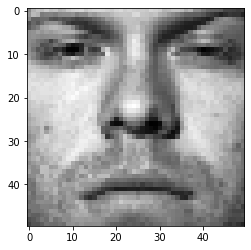

In [2]:
# importing train data
train_labels, train_data = [], []
missing_images = 0


for line in open('faces/train.txt'):
    try:
        im = imageio.imread(line.strip().split()[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])
    except:
        missing_images += 1
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print("No. Train Images not Available: " + str(missing_images))
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

No. Test Images not Available: 0
(100, 2500) (100,)


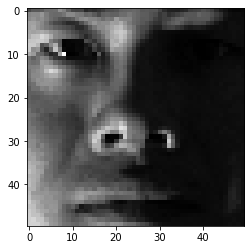

In [3]:
# importing test data
test_data, test_labels = [], []
missing_images = 0


for line in open('faces/test.txt'):
    try:
        im = imageio.imread(line.strip().split()[0])
        test_data.append(im.reshape(2500,))
        test_labels.append(line.strip().split()[1])
    except:
        missing_images += 1
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print("No. Test Images not Available: " + str(missing_images))
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

**(c)** (3 pts) Average Face. Compute the average face $\mu$ from the whole training set by summing up
every row in $X$ then dividing by the number of faces. Display the average face as a grayscale image.

Text(0.5, 1.0, 'Average Face')

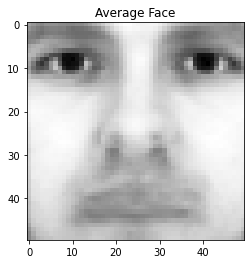

In [4]:
# Average Face sum
average_face = (train_data.sum(axis = 0) / train_data.shape[0])
plt.imshow(average_face.reshape(50,50),
           cmap = cm.Greys_r)
plt.title("Average Face")

**(d)** (3 pts) Mean Subtraction. Subtract average face **μ** from every row in $X$. That is, $x_i := x_i − \mu$, where $x_i$ is the $i$-th row of $X$. Pick a face image after mean subtraction from the new $X$ and display that image in grayscale. Do the same thing for the test set Xtest using the pre-computed average face $\mu$ in **(c)**.

In [5]:
import copy
mean_subtracted = copy.copy(train_data)

for x in range(0, train_data.shape[0]):
    mean_subtracted[x,:] = mean_subtracted[x, :] - average_face

Text(0.5, 1.0, 'Mean-subtracted Face #420')

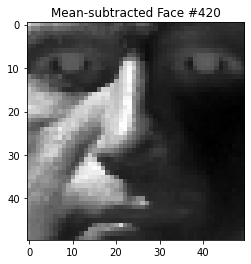

In [6]:
plt.imshow(mean_subtracted[420, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Mean-subtracted Face #420")

Text(0.5, 1.0, 'Face #400')

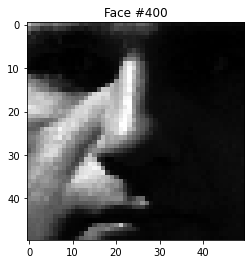

In [7]:
# reference to mean-subtracted image #420
plt.imshow(train_data[420, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Face #400")

**(e)** (10 pts) Eigenface. Perform eigendecomposition on $X^TX = V\lambda V^T$ to get eigenvectors $V^T$ ,
where each row of VT has the same dimension as the face image. We refer to $v_i$, the $i^{th}$
row of $V^T$ , as $i^{th}$ eigenface. Display the first 10 eigenfaces as 10 images in grayscale.

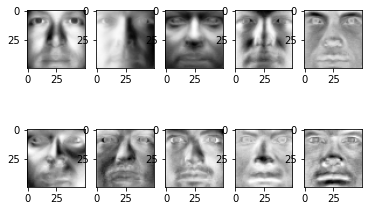

In [8]:
# All of the images are already in vector form

# calculating covariance matrix
cov_matrix = np.cov(mean_subtracted.T)

# calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# consider only real part of complex numbers
eigen_vectors = np.real(eigen_vectors)

# eigenfaces
eigenfaces = eigen_vectors.T

# plot first 10 eigenfaces
f = plt.figure()
for i in range(10):
    f.add_subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i].reshape(50,50), cmap = cm.Greys_r)

plt.show(block=True)

**(f)** (10 pts) Eigenface Feature.

The top $r$ eigenfaces $V^T[: r, :] = {v1, v2, . . . , vr }^T$ span an $r$-dimensional linear subspace of the original image space called face space, whose origin is the average face $\mu$, and whose axes are the eigenfaces ${v1, v2, . . . , vr }$. Therefore, using the top $r$ eigenfaces
${v1, v2, . . . , vr }$, we can represent a 2500-dimensional face image $z$ as an $r$-dimensional feature vector $f: f = V^T [: r, :] z = [v1, v2, . . . , vr ]^T z$.

Write a function to generate $r$-dimensional feature matrix $F$ and $F_{test}$ for training images $X$ and test images $X_{test}$, respectively (to get $F$, multiply $X$ to the transpose of first $r$ rows of $V^T$ , $F$ should have same number of rows as $X$ and
$r$ columns; similarly for $X_{test}$).

In [9]:
def eigenface_feature(V, r, x):
    """
    Eigenface Feature
    
    Description:
    This function represents images in the 2500 dimensional face
    in the r-dimensional space.
    
    Parameters:
    V - Eigenfaces
    r - Number of eigenfaces to consider
    z - Face to represent in r-dimensional space
    """
    return x @ V.T[:r, :].T

In [10]:
# determine number of eigenfaces vectors to consider
r = 347

# Calculating Eigenface features for train and test
train_eigenface_347 = eigenface_feature(eigenfaces, r, train_data)
test_eigenface_347 = eigenface_feature(eigenfaces, r, test_data)

**(g)** (10 pts) Face Recognition. For this problem, you are welcome to use libraries such as scikit learn to perform logistic regression. Extract training and test features for $r = 10$. Train a Logistic Regression model using $F$ and test on $F_{test}$. Report the classification accuracy on the test set. Plot the classification accuracy on the test set as a function of r when $r = 1, 2, . . . ,200$. Use "one-vs-rest" logistic regression, where a classifier is trained for each possible output label. Each classifier is trained on faces with that label as positive data and all faces with other labels as negative data. sklearn calls this the `ovr` mode.

In [11]:
# import sklearn modules
from sklearn.linear_model import LogisticRegression

# intialize series r
r = np.arange(1, 201)

# store accuracy metrics
accuracy = pd.DataFrame(columns = ["r", "IS", "OOS"])

# get accuracy for all r models
for i in r:
    # Calculate Eigenface features for i eigenface vectors
    train_eigenface_i = eigenface_feature(eigenfaces.T, i, train_data)
    test_eigenface_i = eigenface_feature(eigenfaces.T, i, test_data)
    
    # fit model
    clf = LogisticRegression(multi_class = "ovr",
                         max_iter = 1000).fit(train_eigenface_i,
                                              train_labels)
    # calculate accuracy metric
    in_sample_acc_i = clf.score(train_eigenface_i, train_labels)
    oos_acc_i = clf.score(test_eigenface_i, test_labels)
    
    # update accuracy
    accuracy = accuracy.append({"r" : i,
                                "IS" : in_sample_acc_i,
                                "OOS" : oos_acc_i},
                        ignore_index=True)
    
    
accuracy

C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\amira\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,r,IS,OOS
0,1.0,0.129630,0.14
1,2.0,0.120370,0.13
2,3.0,0.151852,0.12
3,4.0,0.187037,0.17
4,5.0,0.472222,0.41
...,...,...,...
195,196.0,1.000000,0.95
196,197.0,1.000000,0.95
197,198.0,1.000000,0.95
198,199.0,1.000000,0.95


Text(0, 0.5, 'OOS Accuracy')

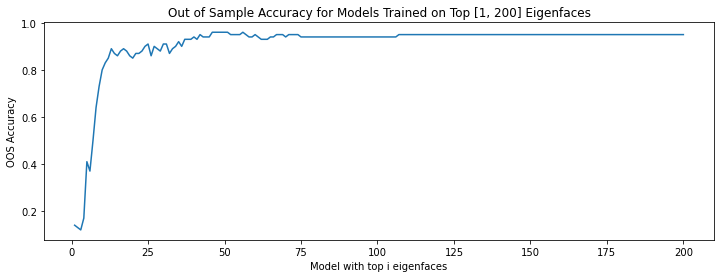

In [12]:
# plot accuracy scores across all 200 models
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(accuracy["r"], accuracy["OOS"])
plt.title("Out of Sample Accuracy for Models Trained on Top [1, 200] Eigenfaces")
plt.xlabel("Model with top i eigenfaces")
plt.ylabel("OOS Accuracy")

In [13]:
accuracy.describe()

,r,IS,OOS
count,200.000000,200.000000,200.000000
mean,100.500000,0.967722,0.911200
std,57.879185,0.137429,0.131934
min,1.000000,0.120370,0.120000
25%,50.750000,1.000000,0.940000
50%,100.500000,1.000000,0.950000
75%,150.250000,1.000000,0.950000
max,200.000000,1.000000,0.960000


## 2. Implement EM algorithm. (40 pts)
In this problem, you will implement a bimodal GMM model fit using the EM algorithm. Bimodal means that the distribution has two peaks, or that the data is a mixture of two groups. If you want, you can assume the covariance matrix is diagonal (i.e. it has the form $diag(\sigma^2_1, \sigma^2_2, ..., \sigma^2_d)$ for scalars $\sigma_i$) and you can randomly initialize the parameters of the model. 

You will need to use the [Old Faithful Geyser Dataset](https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat). The data file contains 272 observations of the waiting time between eruptions and the duration of each eruption for the Old Faithful geyser in
Yellowstone National Park.

You should do this without calling the [Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) library in scikit learn. You can use numpy or scipy for matrix calculation or generating Gaussian distributions.

**(a)** (2 pts) Treat each data entry as a 2 dimensional feature vector. Parse and plot all data points on 2-D plane.

In [14]:
# import dataset 
faithful_df = pd.read_excel("Old_Faithful_Geyser_Data.xlsx")

# snapshot
faithful_df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [15]:
# descriptive statistics
faithful_df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


Text(0, 0.5, 'Duration of eruption')

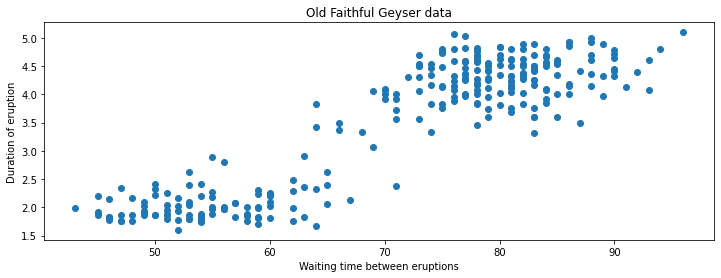

In [16]:
# plot Old Faithful Geyser data
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter(faithful_df["waiting"], faithful_df["eruptions"])
plt.title("Old Faithful Geyser data")
plt.xlabel("Waiting time between eruptions")
plt.ylabel("Duration of eruption")

**(b)** (3 pts) Recall that EM learns the parameter $\theta$ of a Gaussian mixture model $P_\theta(x, z)$ over a dataset $D = \{x^{(i )}|i = 1, 2, ...n\}$ by performing the E-step and the M-step for $t = 0, 1, 2, ...$. We repeat the E-step and and M-step until convergence.

In the E-step, for each $x^{(i)} \in D$, we compute a vector of probabilities $P_{\theta t} (z = k | x)$ for the event that each $x^{(i)}$ originates from a cluster $k$ given the current set of parameters $\theta_t$.

Write the expression for $P_{\theta t} (z = k | x)$, which is the posterior of each data point $x^{(i)}$. Recall that by Bayes’ rule,

$$ P_{\theta t} (z = k | x) = \frac{P_{\theta t} (z = k, x)}{P_{\theta t} (x)} = \frac{P_{\theta t} (z = k, x)}{\Sigma_{l = 1}^k P_{\theta t} (x|z = l) P_{\theta t}(x = l)} $$

Note that we have seen this formula in class. We are asking you to write it down and try to
understand and it before implementing it in part (e).

Let's define the variables.

$x^{(i)} \in \mathbb{R}$ represents the datapoints we look to cluster.

$z^{(i)} \in {1, 2}$ are the cluster ID's.

We are looking to fit a gausian mixture model and we are told that there are two clusters in the data. We can observe these clusters in the visualization above. The first cluster is denoted $z^{(1)}$ and the second cluster is denoted $z^{(2)}$. $x \in \mathbb{R}$ is continuous, and conditioned on $z = k$, we have a normal distribution $P_\theta (x | z= k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The paramter $\theta_k$ defines $\mu_k,\ \Sigma_k, \phi_k$ for all $ k \in \{1, 2\}$.

This is the intuition behind the GMM model. We will look to sample realizations from the RV $P_\theta (x | z= k) = \mathcal{N}(\mu_k, \Sigma_k)$. To do this we will utilize the EM (Expectation Maximization) algorithm. The EM algorithm learns the parameters $\theta$ of a latent variable model $P_\theta (x, z)$ over the dataset $\mathcal{D} = \{ x^{(i)} | i = 1, 2, ..., n \}$ over two steps.

1. Expectation-step: For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t} (z | x^{(i)})$. This means that we calculate the expected values for these clusters of $\theta_t$.
2. Maximization-step: This consists of maximatizing the expectations calculated in the E-step with respect to the model parameters. This step updates the values of $\mu_k,\ \Sigma_k, \phi_k$ for all $k$. Compute new weights $\theta_{t+1}$ as
$$ \theta_{t + 1} = \mathop{max}_{\theta} \Sigma_{i = 1}^n \bigg( \mathbb{E}_{z^{(i)} \sim P_{\theta_t} (z | x^{(i)})} log P_\theta (x^{(i)}, z^{(i)}) \bigg)$$

$$ = \mathop{max}_{\theta} \bigg( \Sigma_{k=1}^K \Sigma_{x \in \mathcal{D}} P_{\theta_t} (z_k | x) log P_\theta (x|z_k) + \Sigma_{k=1}^K \Sigma_{x \in \mathcal{D}} P_{\theta_t} (z_k | x) log P_\theta (z_k) \bigg) $$

We repeat this for $t = 1, 2, ...,$ until convergence, ultimately returning the maximum likelihood estimate of the data with $k$ clusters. The algoirhtm works because knowing the cluster assignment for each $x^{(i)}$ makes solving for $\mu_k,\ \Sigma_k, \phi_k$ easy, and knowing $\mu_k,\ \Sigma_k, \phi_k$ makes inferring $P(z | x^{(i)})$ easy. Alternating between which values are assumed known, the MLE of the non-fixed values can be calculated efficiently.

EM is a technique commonly used to estimate a model's parameters, and these are learned the MLE (maximum likelihood estimation) techniques. Unfortunately, finding the MLE solution for mixture models by differentiating the log likelihood and solving for 0 is usually analytically impossible. The EM algorithm is a numeric technique for the MLE, and is used when closed form expressions for updating model parameters can be calculated. EM is an iterative algorithm and has the convenient property that the maximum likelihood of the data strictly increased with each subsequent iteration, it is guarenteed to converge to a local maximum. 

So we have the following equation for the posterior of the E-step in each iteration of the EM algorithm.

$$ P_{\theta_t} (z_k | x) = \frac{P_{\theta_t} (z = k, x)}{P_{\theta_t} (x)} = \frac{P_{\theta_t} (x|z_k) P_{\theta_t} (z_k)}{\Sigma_{l = 1}^k P_{\theta_t} (x|z_l) P_{\theta_t}(z_l)} $$

Let's look at each component of the equation.

- $P_{\theta t} (x|z_k) = \prod_{j = 1}^d P_\theta (x_j | y = k) \newline$
This is the probability of the data coming from a cluster $z_k$. This is the product of the occurance probabilities of each $x^{(i)}$. 

- $P_{\theta_t} (z_k) = \phi_k \newline$
This is the probability of cluster $z_k$. It is determined as the average likelihood of all the data points for distribution/cluster $z_k$. 

- $\Sigma_{l = 1}^k P_{\theta_t} (x_l) P_{\theta_t}(z_l)\newline$
This is the law of total probability. In our case, it is the sum of all probabilities of all datapoints appearing in a cluster for all clusters.

**(c)** (5 pts) In the M-step, we compute new parameters $\theta_{t+1}$. Our goal is to find $\mu_k$, $\Sigma_k$ and $\phi_k$ that optimize

$$ \mathop{max}_{\theta} \bigg( \Sigma_{k=1}^K \Sigma_{x \in D} P_{\theta_t} (z_k | x) log P_\theta (x | z_k) + \Sigma_{k=1}^K \Sigma_{x \in D} P_{\theta_t} (z_k | x) log P_\theta (z_k)  \bigg) $$

Write down the formula for $\mu_k, \Sigma_k$, and for the parameters $\phi_k$ at the M-step (we have also seen these formulas in class).

Let $\gamma$ be the likelihood of one data point being realized from cluster/distribution $z_k$. Intuitively, this represents the likelihood of a point being part of a cluster. The liklihood calculated using the gausian probability density function, and takes $\mu_k, \Sigma_k$ as input. I use $z_k$ for $z = k$.

One Dimensional Model:
$$ \gamma_i = \mathcal{N}(x| \mu_i, \sigma_i) = P(z_k| x^{(i)}) = \frac{1}{\Sigma_k \sqrt{2\pi}} e^{\frac{-(x^{(i)} - \mu_k)^2}{2\Sigma^2}}$$

Multi-Dimensional Model:
$$ \gamma_i = \mathcal{N}(\vec{x}| \vec{\mu}_i, \Sigma_i) = P(z_k| x^{(i)}) = \frac{1}{\sqrt{(2\pi)^K |\Sigma_i|}} e^{-\frac{1}{2} (\vec{x} - \vec{\mu}_i)^T \Sigma_i^{-1}(\vec{x} - \vec{\mu}_i)}$$

As a result we can calculate the closed form solution $\mu_k, \Sigma_k, \phi_k$ by taking the derivative of the objective function, setting it to 0 and solving for these parameters. Inquitively, the optimal mean and covariance are the emperical mean and covariance of the dataset $\mathcal{D}$ when each element $x^{(i)}$ has weight $\gamma_i$.

Given that this data has weights, the best guess of the mean $\mu$ of each cluster $k$ is then calculated as the mean of the data where each data point $x^{(i)}$ is scaled by $\gamma_i$, that is its likelihood (or probability kinda) of appearing in cluster $z_k$.

$$ \mu_k = \frac{\Sigma_{i = 1}^n \gamma_i x^{(i)}}{n_k} $$

Similarly, we take the weighted averages of the covariances to calculate $\Sigma_k$.

$$ \Sigma_k = \frac{\Sigma_{i = 1}^n \gamma (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^T}{n_k} $$

The normalizing parameter here $n_k$ is the sum of the probabilities that all $x_i$ belong to cluster $z_k$ for all $x \in \mathcal{D}$.

$$ n_k = \Sigma_{i = 1}^n \gamma_i $$

The best estimate for the proportion of each class, denoted $\phi_k$ is the average of the probabilities that the datapoints belong to cluster $z_k$, where $n$ is of course the number of datapoints.

$$ \phi_k = \frac{n_k}{n} $$

**(d)** (25 pts) Implement and run the E Malgorithm. Specifically:

    i. (10 pts) Implement the EM algorithm from scratch (e.g., in Python and numpy).
    
The implementation programed below is the best we could do. The shapes of the variables are good, I believe the problem has to do with how the variables are being updated. We understand the intuition behind the GMM and EM algorithms.
    
    ii. (5 pts) Choose a termination criterion for when the algorithm stops repeating the E-step and the M-step. State your termination criterion and explain the reasoning behind it.
    
A logical termination criterion for then the algorithm stops repeating the E-step and the M-step would be when none of the conditional probabilities computed during the previous E-step changes in a meaningful way as compared to the previous iteration. In other words, if continuing to run the E-step yields infinitely small changes in the conditional probability then it would make sense to terminate. The threshold in which termination occurs may vary but a standard number to implement could be 1e-6.
    
    iii. (10 pts) Plot the trajectories of the two mean vectors (μ1 and μ2) in two dimensions as they change over the course of running EM. You might want to use a scatter plot for this.
    
To plot the trajectories of the vectors $\mu_1$ and $\mu_2$ across iterations one simply has to save them to a variable, and the plot the difference between every consecutive set of $\mu$s over the final distributions $\mathcal{N}(\mu_{t1}, \Sigma_{t1})$ and $\mathcal{N}(\mu_{t2}, \Sigma_{t2})$.

In [17]:
# helper functions
from scipy.stats import multivariate_normal

def random_sample(arr, n = 1):
    """
    Selects n many random items from a list.
    This is used to initialize mus.
    """
    return arr[np.random.choice(len(arr), size=n, replace=False)]

def covariance(x, y):
    """
    Return covariance of two vectors x, y
    """
    # get means of each vec
    mean_x = sum(x)/float(len(x))
    mean_y = sum(x)/float(len(x))
    
    # distance between point and mean of vec
    dist_x = [i - mean_x for i in x]
    dist_y = [i - mean_y for i in y]
    
    # solve covariance
    cov = (sum([dist_x[i] * dist_y[i] for i in range(len(dist_x))])) / (len(x) - 1)
    return np.cov(x, y)

def solve_mu_k(gamma_k, x_k, n_k):
    """
    Solves for mean of cluster k given hilucinated x assigned data points
    """
    return np.sum(gamma_k * x_k) / n_k


def solve_Sigma_k(gamma_k, x_k, n_k):
    """
    Solves for covariance of cluster k given hilucinated x assigned data points
    """
    mu_k = solve_mu_k(gamma_k, x_k, n_k)
    var_part = np.array([x_k[i] - mu_k for i in range(len(x_k))])
    return np.sum(gamma_k.reshape(-1, 1, 1) * (var_part @ var_part)) / n_k


def solve_phi_k(gamma_k, n_k):
    """
    Solve for probability of cluster
    This is the average of the likelihoods of all x given cluster gamma_k 
    """
    x_len = len(x)
    return np.sum(gamma_k) / n_k
    
    
def likelihood(x, mu, Sigma):
    """
    Likelihood Function for p(x|z_k)
    Multivariate Gaussian PDF given point x
    """
    return multivariate_normal(mean = mu, cov = Sigma).pdf(x)

def log_likelihood(x, mu, Sigma):
    """
    Log of the Multivariate Gaussian PDF given point x
    """
    return np.log(likelihood(x, mu, Sigma))

def hallucinate_x_assignments(gamma, x):
    """
    Assume cluster index label for values in x given posterior probabilities
    """
    # store labels
    hallucinated_labels = np.zeros(len(x))
    
    # assign label per gamma
    for i in range(len(x)):
        if gamma[i, 0] > gamma[i, 1]:
            hallucinated_labels[i] = 0
        else:
            hallucinated_labels[i] = 1
            
    return hallucinated_labels

In [18]:
# Now that we have all the parts, let's put everything together

#################
### GMM Model ###
#################

def GMM_implementation(x, termination_criteria = 100):
    """
    Gausian Mixture Model
    
    Assumes there are K = 2 clusters.
    """
    # step counter
    iteration = 0
    
    ### getting initial mu's, Sigma's, and phi's
    
    # initial component means will be set to random data points x_i in D
    mu_prior = np.zeros([2, 2])

    for k in range(2):
        # get random index
        index = np.random.randint(len(x))
        
        # get two mu's for both columns of x
        mu_0 = x[index, 0]
        mu_1 = x[index, 1]
        mu_prior[k] = np.array([mu_0, mu_1])

    # intitial component variances will be set to the sample covariance
    cov_initial = covariance(x[:, 0], x[:, 1])
    Sigma_0 = np.cov(x[:, 0], x[:, 1])
    Sigma_1 = np.cov(x[:, 0], x[:, 1])
    Sigma_prior = np.array([Sigma_0, Sigma_1])

    # initial component distribution prior estimates are
    # set to the uniform distribution
    phi_0 = 1.0 / 2.0
    phi_1 = 1.0 / 2.0
    phi_prior = np.array([phi_0, phi_1])
    
    print(mu_prior)
    print(Sigma_prior)
    print(phi_prior)
    
    # initialize prior likelihood
    prior_log_likelihood = 0
    
    # EM Algorithm
    while True:    
        # E-step
        gamma = np.zeros((len(x), 2))
        law_of_total_prob = 0
        print(x.shape, mu_prior.shape, Sigma_prior.shape, phi_prior.shape)
        for k in range(2):
            law_of_total_prob += np.sum(log_likelihood(x, mu_prior[k], Sigma_prior[k])) * phi_prior[k]
            
        
        for k in range(2):
            for i in range(len(x)):
                gamma[i, k] = log_likelihood(x[i], mu_prior[k], Sigma_prior[k]) * phi_prior[k] / law_of_total_prob
        
        #print(gamma)
            
            
        # test for convergence
        #post_log_likelihood = posterior
        if (iteration > termination_criteria):
            print(f"Model Converged at {iteration} iterations.")
            return mu_prior, Sigma_prior
        
        # M-step
        # assume assignments
        x_hallucinations = hallucinate_x_assignments(gamma = gamma, x = x)
        
        mu_post = np.zeros(2)
        Sigma_post = np.zeros(2)
        phi_post = np.zeros(2)
                                 
        for k in range(2):            
            # calculate means and probabilities of clusters
            n_k = np.sum(x_hallucinations == k)
            x_in_k = [x_hallucinations == k]
            x_k = x[x_in_k]
            likelihood_k_i = multivariate_normal.pdf(x_k, mu_prior[k], Sigma_prior[k]).reshape(-1, 1)
            phi_post[k] += solve_phi_k(likelihood_k_i, n_k)
            mu_post[k] += solve_mu_k(likelihood_k_i, x_k, n_k) + 1e-10
                    
            # calculate sum of log likelihoods
            gamma_k_prior = np.sum(gamma[k])
                    
            # with the mean of the clusters we can calculate the covariances
            for i in range(len(x)):
                if x_hallucinations[i] == k:
                    Sigma_post[k] += solve_Sigma_k(gamma_k =  gamma_k_prior, x_k = x_hallucinations, n_k = n_k) + 1e-10
        
            # final calculations
            mu_prior[k] = mu_post
            Sigma_prior[k] = Sigma_post
            phi_prior[k] = phi_post[k] / len(x)
            
        
        Sigma_prior = np.array(Sigma_prior)
        
        print(mu_prior)
        print(np.array(Sigma_prior))
        print(np.array(phi_prior))
        
        
        
        iteration += 1
        print(iteration)

In [19]:
# casting x as array
x = np.array(faithful_df)

# GMM
GMM_implementation(x)

[[ 4.333 82.   ]
 [ 2.017 52.   ]]
[[[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]

 [[  1.30272833  13.97780785]
  [ 13.97780785 184.82331235]]]
[0.5 0.5]
(272, 2) (2, 2) (2, 2, 2) (2,)
[[0.14109569 0.        ]
 [0.14109569 0.17360483]]
[[[0.60443981 0.        ]
  [0.60443981 0.        ]]

 [[0.60443981 0.59670647]
  [0.60443981 0.59670647]]]
[8.6271671e-06 7.8664628e-06]
1
(272, 2) (2, 2) (2, 2, 2) (2,)


C:\Users\amira\AppData\Local\Temp/ipykernel_17684/650328186.py:84: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_k = x[x_in_k]


ValueError: the input matrix must be positive semidefinite

**(e)** (5 pts) If you were to run K-means clustering instead of the EM algorithm you just implemented, do you think you will get different clusters? You are welcome to experiment with
K-means clustering on the same dataset with $K = 2$. (The KNN library from scikit learn
is a good way to try). Comment on why do you think the results will or will not change.

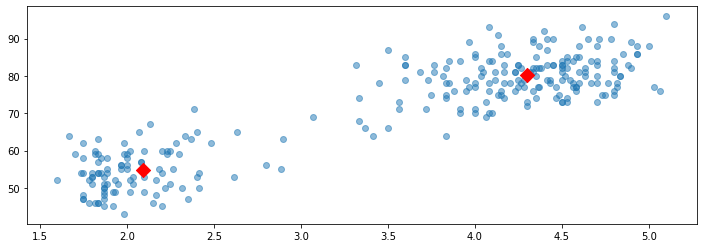

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

# display the clusters in 2D
plt.scatter(x[:,0], x[:,1], alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='D', c='r', s=100)

If I were to run K-means clustering instead of the EM algorithm, I do think slightly different clusters will appear. The K-means algorithm may perform non-trivially worse if there are recognized outliers that don't obviously belong to a cluster within the data. Another reason why I believe the results may subtly change is that K-means locates and places points based on means which assumes a certain shape to the data whereas in EM, we assume that data points are gaussian distributed. This makes K-means biased towards spherical clusters. Additionally, we can assume that results may differ due to the difference of how EM assigns points to a given set of clusters. EM assigns points based on the likelihood of a point belonging to a particular cluster and does not depend on the L2 norm like K-means does.